<h1 style="font-size:30px;">Activation Functions</h1>

In this notebook, we will explore the most commonly used activation functions in deep learning. They are:

1. Sigmoid
2. ReLU
3. Tanh
4. ELU
5. Softmax

First, we will use low-level PyTorch functions to implement the above activation functions from scratch. Then, will also explore the high-level APIs that PyTorch provides using the `torch.nn.functional` module.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_activations_functions.png' width=800 align='center'>

## Table of Contents
* [1 Implementing Sigmoid Activation Function](#1-Implementing-Sigmoid-Activation-Function)
* [2 Implementing ReLU Activation Function](#2-Implementing-ReLU-Activation-Function)
* [3 Tanh Activation Function](#3-Tanh-Activation-Function)
* [4 ELU Activation Function](#4-ELU-Activation-Function)
* [5 Softmax Activation Function](#5-Softmax-Activation-Function)
* [6 Implementing Activation Functions with PyTorch Functional Module](#6-Implementing-Activation-Functions-with-PyTorch-Functional-Module)
    * [6.1 PyTorch Sigmoid Activation](#6.1-PyTorch-Sigmoid-Activation)
    * [6.2 PyTorch ReLU Activation Function](#6.2-PyTorch-ReLU-Activation-Function)
    * [6.3 PyTorch Tanh Activation Function](#6.3-PyTorch-Tanh-Activation-Function)
    * [6.4 PyTorch ELU Activation Function](#6.4-PyTorch-ELU-Activation-Function)
    * [6.5 PyTorch Softmax Function](#6.5-PyTorch-Softmax-Function)

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

block_plot = False
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 6)

We will be visualizing the plot of each activation function output. So, before moving ahead into the implementation of the functions, let's write a small function that will plot these graphs by taking a certain number of inputs.

In [ ]:
def plot_activation(x, out_x, y_label, title):
    plt.figure
    plt.plot(x, out_x, color='b')
    plt.xlabel('x')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show(block=block_plot)
    plt.close()

## 1 Implementing Sigmoid Activation Function

The Sigmoid function is given by:

$$
y' = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

It is best suited for binary classification. As such, we can infer a few things from the following:

- If $sigmoid(z) > 0.5$ then input belongs to the positive class or class `1`
- If $sigmoid(z) < 0.5$ then input belongs to the negative class or class `0`

The `sigmoid` output $y'$ may be thought of as the probability that the data point belongs to class `1`. So, the probability that it belongs to class `0` will be $1-y'$.

It is mostly used in the final layer of a neural network.

One of the biggest disadvantages of the Sigmoid activation is the vanishing gradient problem.

In [ ]:
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

tensor([4.5398e-05, 4.6316e-05, 4.7252e-05, 4.8208e-05, 4.9183e-05, 5.0177e-05,
        5.1192e-05, 5.2227e-05, 5.3283e-05, 5.4360e-05])


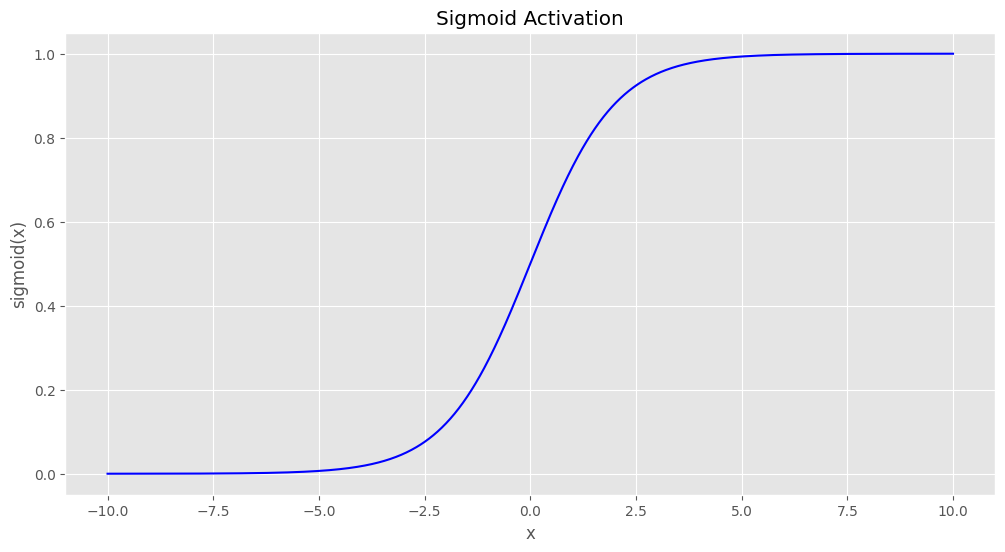

In [ ]:
# Plot sigmoid activation function.
x = torch.linspace(-10, 10, 1000)
y = sigmoid(x)
print(y[:10])

plot_activation(x, y, 'sigmoid(x)', 'Sigmoid Activation')

**We can observe the following points in `sigmoid` plot:**

- $sigmoid(0) = 0.5$
- $sigmoid(x) > 0.5$    $\text{  }\forall\text{ }x > 0$
- $sigmoid(x) < 0.5$    $\text{  }\forall\text{ }x < 0$


## 2 Implementing ReLU Activation Function
For any given input, the ReLU (Rectified Linear Unit) activation function either returns 0 or the same value as the input. The following is the formula:

$$
ReLU(x) = max(0, x)
$$

**So, when does it return 0?** *Whenever the input value is less than 0, it returns 0, else always return the same value as the input*.

Breaking down the above explanation into a simple $if$ statements will look something like this:

$$
   ReLU(x) =
\begin{cases}
    0,& \text{if } x < 0\\
    x,              & \text{otherwise}
\end{cases}
$$

Now, let's implement ReLU.

In [ ]:
def relu(x):
    return x.clamp(min=0.0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


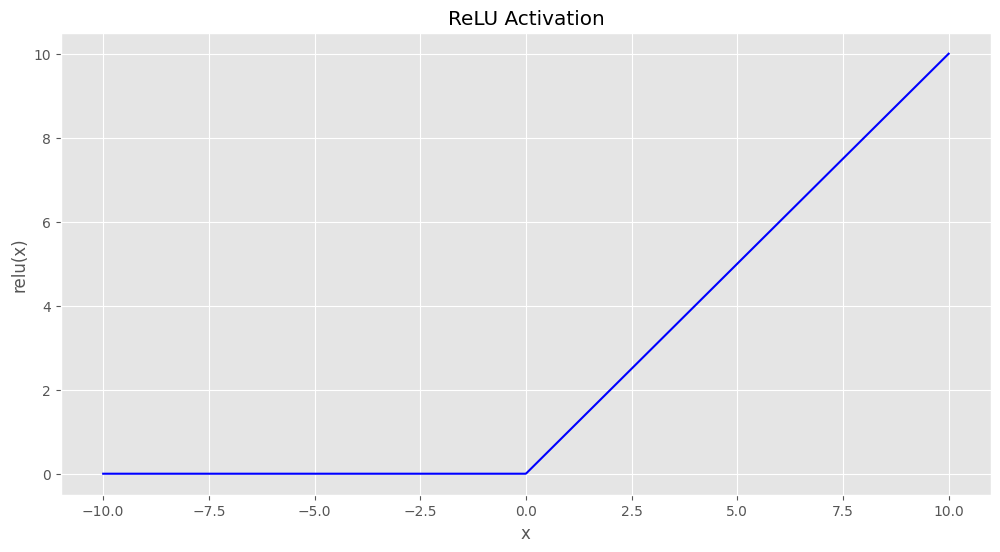

In [ ]:
# Plot relu activation function.
x = torch.linspace(-10, 10, 1000)
y = relu(x)
print(y[:10])

plot_activation(x, y, 'relu(x)', 'ReLU Activation')

## 3 Tanh Activation Function
The tanh activation function is somewhat similar to the sigmoid activation function, at least, in terms of the plot.

But instead of the output range being between 0 to 1, it ranges from -1 to 1.

And the following gives the formula for tanh activation:

$$
tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

The following code block shows the implementation.

In [ ]:
def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])


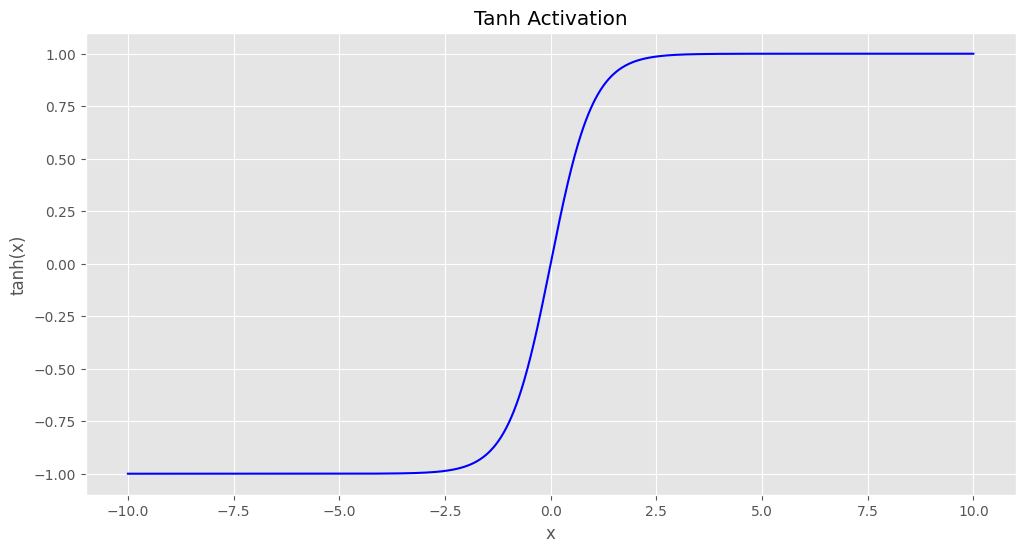

In [ ]:
# Plot tanh activation function.
x = torch.linspace(-10, 10, 1000)
y = tanh(x)
print(y[:10])

plot_activation(x, y, 'tanh(x)', 'Tanh Activation')

## 4 ELU Activation Function
ELU stand for Exponential Linear Unit. Compared to ReLU, this also has an alpha constant ($\alpha$) which also applies a bit of non-linearity to when the values are negative.

We can calculate ELU as:

$$
   ELU(x) =
\begin{cases}
    \alpha(e^x - 1),& \text{if } x < 0\\
    x,              & \text{otherwise}
\end{cases}
$$
It has a few advantanges over ReLU such as:
* ELU is less likely to have an exploding gradient problem as sometimes maybe the case with ReLU.
* Also, ELU does not suffer from the *dying relu* issue as ReLU does.

Still, one major disadvantage of ELU is that it is slower to compute because it also applies non-linearity to negative inputs.

In [ ]:
def elu(x, alpha=1.0):

    elu_outputs = x.clone()
    elu_outputs[x<0] = alpha * (torch.exp(x[x<0]) - 1)

    return elu_outputs

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9999,
        -0.9999, -0.9999])


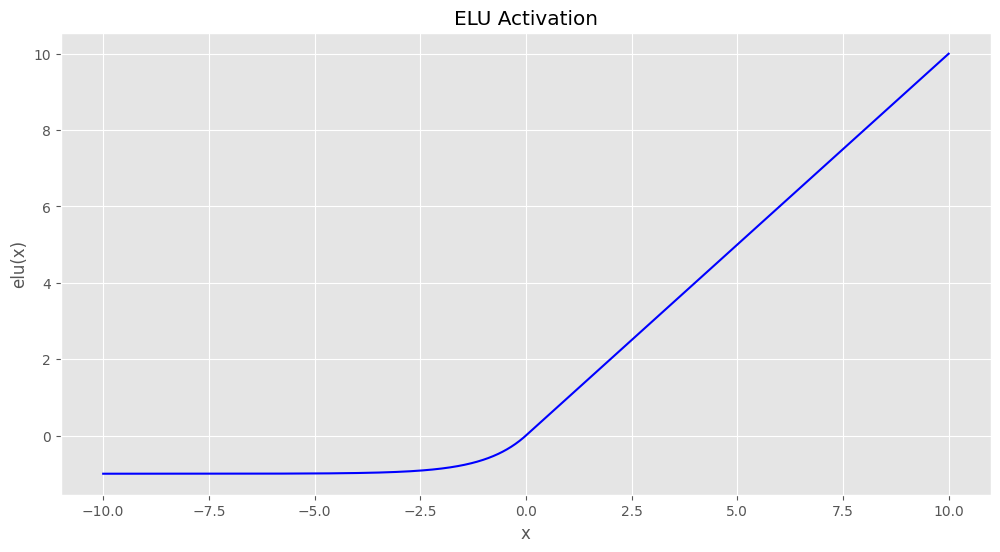

In [ ]:
# Plot elu activation function.
x = torch.linspace(-10, 10, 1000)
y = elu(x)
print(y[:10])

plot_activation(x, y, 'elu(x)', 'ELU Activation')

## 5 Softmax Activation Function
Although we can call Softmax an activation function, *but it is not really an activation function*.

The Softmax function returns the probability distribution of the given inputs. Typically, the inputs can be values from -∞ to +∞. But after the Softmax activation has been applied, the output values are from 0 to 1.

And it is mostly used in the last layer of neural network. The Softmax function takes in the logits (direct outputs of the neural network) and converts them to probability distribution for further operations.

Let's take a look at the formula:
$$
Softmax(x_i) = \frac{exp(x_i)}{\sum_{i=0}^{n}exp(x_i)}
$$

Now implementing the same using Python.

In [ ]:
def softmax(x):
    return (x.exp() / torch.sum(x.exp()))

Now, let's check out how softmax may actually change the values from simple model outputs (logits) to probability distribution.

<img src='https://learnopencv.com/wp-content/uploads/2022/01/c4_02_softmax_numeric_conversion.png' width=600 align='center'>

In [ ]:
# Plot softmax activation function.
x = torch.tensor([-3, 5, 1], dtype=torch.float)
y = softmax(x)
print(y.numpy())

[3.2932044e-04 9.8169041e-01 1.7980287e-02]


## 6 Implementing Activation Functions with PyTorch Functional Module

We can also implement all of the above activation functions using the `torch.nn.functional` module. We need not write the function on our own. Instead, we just need to call the right function with one line of code.

### 6.1 PyTorch Sigmoid Activation

tensor([4.5398e-05, 4.6316e-05, 4.7252e-05, 4.8208e-05, 4.9183e-05, 5.0177e-05,
        5.1192e-05, 5.2227e-05, 5.3283e-05, 5.4360e-05])


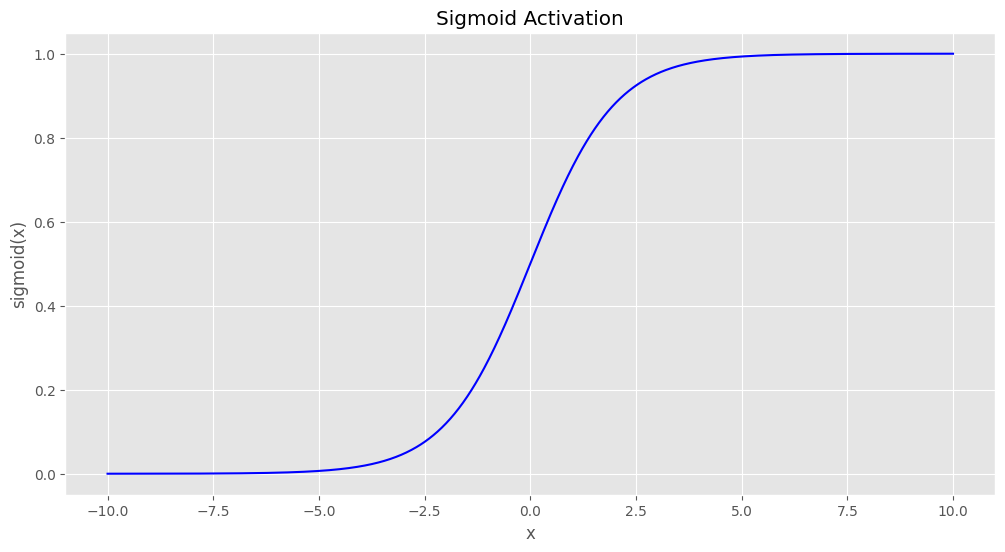

In [ ]:
# Plot sigmoid activation function.
x = torch.linspace(-10, 10, 1000)
y = F.sigmoid(x)
print(y[:10])

plot_activation(x, y, 'sigmoid(x)', 'Sigmoid Activation')

### 6.2 PyTorch ReLU Activation Function

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


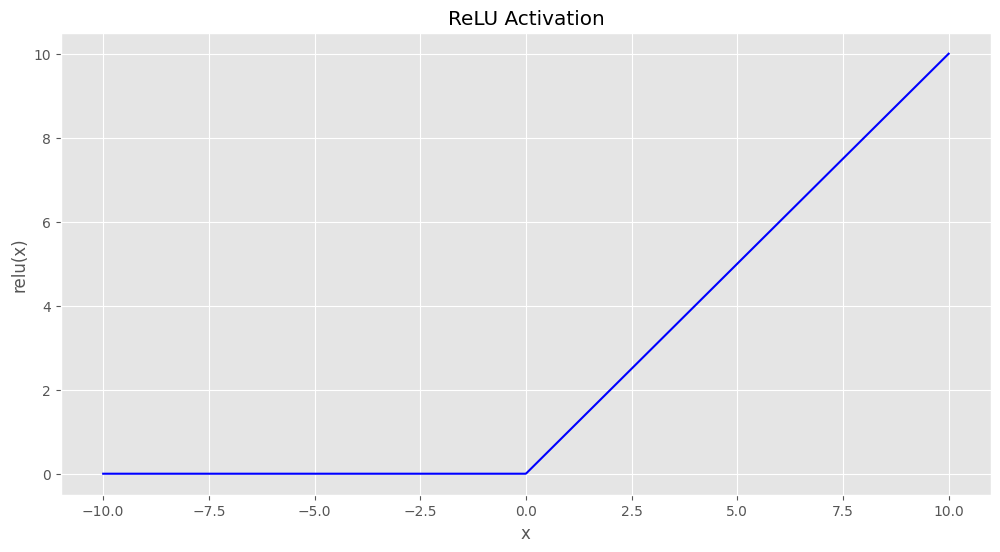

In [ ]:
# Plot relu activation function.
x = torch.linspace(-10, 10, 1000)
y = F.relu(x)
print(y[:10])

plot_activation(x, y, 'relu(x)', 'ReLU Activation')

### 6.3 PyTorch Tanh Activation Function

tensor([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])


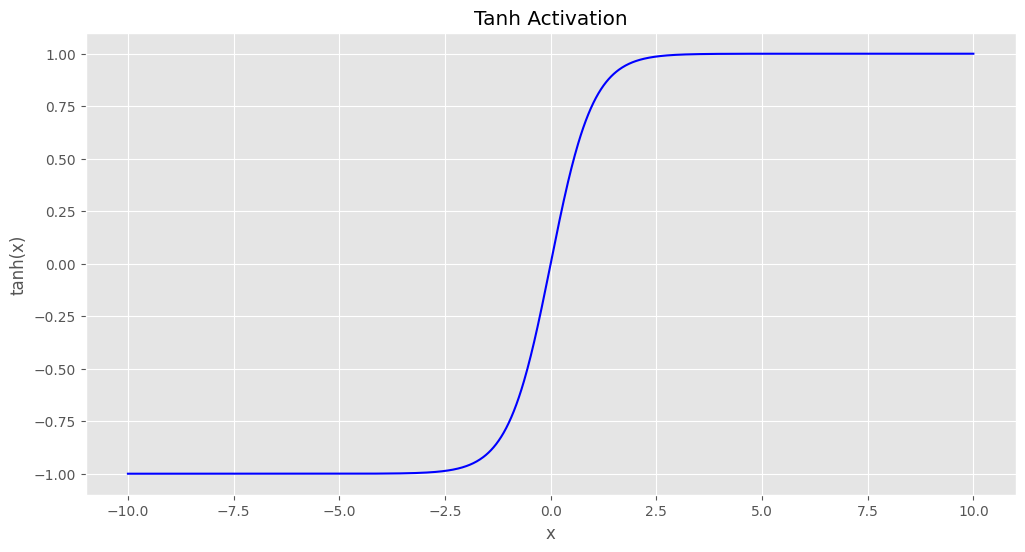

In [ ]:
# Plot tanh activation function.
x = torch.linspace(-10, 10, 1000)
y = F.tanh(x)
print(y[:10])

plot_activation(x, y, 'tanh(x)', 'Tanh Activation')

### 6.4 PyTorch ELU Activation Function

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999, -0.9999,
        -0.9999, -0.9999])


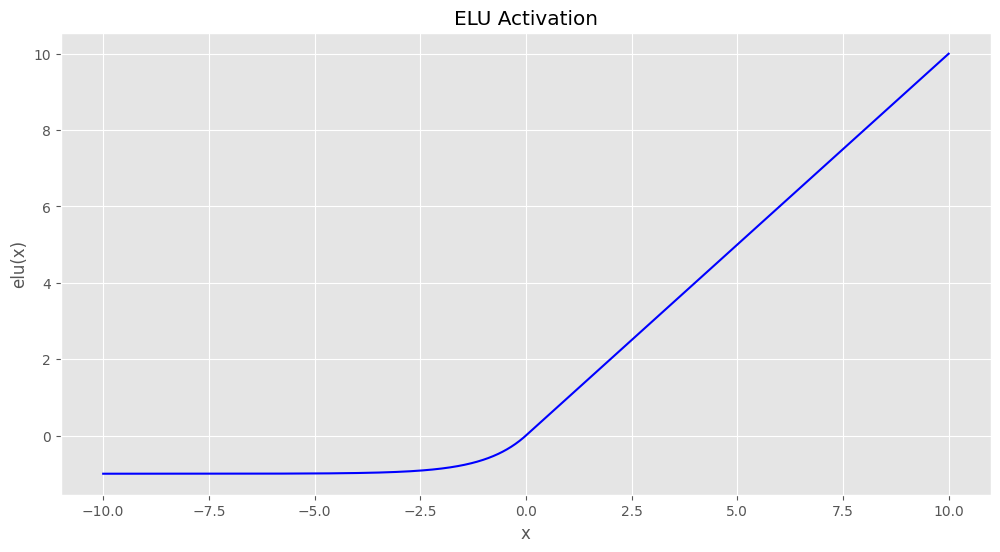

In [ ]:
# Plot elu activation function.
x = torch.linspace(-10, 10, 1000)
y = F.elu(x)
print(y[:10])

plot_activation(x, y, 'elu(x)', 'ELU Activation')

### 6.5 PyTorch Softmax Function

In [ ]:
# Plot softmax activation function.
x = torch.tensor([-3, 5, 1], dtype=torch.float)
y = F.softmax(x, dim=-1)
print(y)

tensor([3.2932e-04, 9.8169e-01, 1.7980e-02])


As you can see from the above plots, the values as well as the graphs as exactly the same as we had in the manual implementation case. But here, we calling the activation functions using the `torch.nn.functional` module with just one line of code. This is much more convient while doing large projects, as it is less error-prone and makes the code more concise as well.

## 7 Time Comparison Between Different Activation Functions

Let's check out the execution time of each activation function here. We will use the `torch.nn.functional` module to check run them again.

We will take the average of 50 runs for each of the activation functions.

In [ ]:
import time

# List to store all the activation function execution times.
activation_times = []
N_RUNS = 50

X = torch.linspace(-100, 100, 10000000)

In [ ]:
def calculate_and_store_time(
    function_name, avg_run_time
):
    print(f"Time taken for {function_name}: {avg_run_time:.5f}")
    activation_times.append(avg_run_time)

In [ ]:
run_times = []

for i in range(N_RUNS):
    start = time.time()
    y = F.sigmoid(X)
    end = time.time()
    run_times.append(end-start)

avg_run_time = sum(run_times)/len(run_times)
calculate_and_store_time('sigmoid', avg_run_time)

Time taken for sigmoid: 0.06517


In [ ]:
run_times = []

for i in range(N_RUNS):
    start = time.time()
    y = F.relu(X)
    end = time.time()
    run_times.append(end-start)

avg_run_time = sum(run_times)/len(run_times)
calculate_and_store_time('relu', avg_run_time)

Time taken for relu: 0.03118


In [ ]:
run_times = []

for i in range(N_RUNS):
    start = time.time()
    y = torch.tanh(X)
    end = time.time()
    run_times.append(end-start)

avg_run_time = sum(run_times)/len(run_times)
calculate_and_store_time('tanh', avg_run_time)

Time taken for tanh: 0.04912


In [ ]:
run_times = []
for i in range(N_RUNS):
    start = time.time()
    y = F.elu(X)
    end = time.time()
    run_times.append(end-start)

avg_run_time = sum(run_times)/len(run_times)
calculate_and_store_time('elu', avg_run_time)

Time taken for elu: 0.04819


In [ ]:
run_times = []
for i in range(N_RUNS):
    start = time.time()
    y = F.softmax(X, dim=-1)
    end = time.time()
    run_times.append(end-start)

avg_run_time = sum(run_times)/len(run_times)
calculate_and_store_time('softmax', avg_run_time)

Time taken for softmax: 0.08423


In [ ]:
activation_names = ["Sigmoid", "ReLU", "Tanh", "ELU", "Softmax"]

# Mapping
activation_times_dict = dict(zip(activation_names, activation_times))

for name, time in activation_times_dict.items():
    print(f"Time taken by {name}: {time:.6f} seconds")

Time taken by Sigmoid: 0.065174 seconds
Time taken by ReLU: 0.031179 seconds
Time taken by Tanh: 0.049118 seconds
Time taken by ELU: 0.048193 seconds
Time taken by Softmax: 0.084235 seconds


By comparing the time taken by intermediate activation functions (i.e., ReLU, Tanh, and ELU), Tanh is the slowest due to its computation complexity. For output activation functions (i.e., Sigmoid and Softmax), Softmax is the slowest.

**Note**: "Colab may not be ideal for timing benchmarks due to its shared resources. We recommend running this experiment locally to observe trends in activation timing proportional to computational complexity."